# CRISP-DM

<span style="font-size: 16px;">
Proses pembangunan sistem rekomendasi menggunakan kerangka kerja CRISP-DM. Kerangka kerja CRISP-DM memberikan gambaran tentang siklus hidup proyek data mining. CRISP-DM memiliki 6 tahapan yaitu Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, dan Deployment seperti ditunjukkan pada gambar di bawah
</span>&nbsp;

<img src="Gambar/CRISP-DM.png" width="400"/>&nbsp;

<span style="font-size: 16px;">
Dalam note book ini akan dijelaskan implementasi setiap langkah-langkah dari CRISP-DM dalam pembuatan sistem rekomendasi untuk menentukan posisi pemain sepakbola terbaik terkecuali tahapan business understanding
</span>&nbsp;

### Data Understanding

<span style="font-size: 16px;">
Tahap pemahaman data dimulai dengan pengumpulan data awal dan dilanjutkan dengan aktivitas yang memungkinkan untuk mengenal data, mengidentifikasi masalah kualitas data, menemukan informasi tentang data, dan / atau mendeteksi subset yang menarik untuk membentuk hipotesis mengenai informasi tersembunyi.
</span>&nbsp;

**Pengumpulan Data Awal**

Tahap pengumpulan data dilakukan dengan memuat data pemain yang awalnya dalam bentuk CSV menjadi bentuk sebuah dataframe dan memilih fitur yang akan digunakan dalam pembuatan model. Fitur tersebut adalah 
1. Acceleration 
2. Sprint 
3. Positioning 
3. Finishing 
4. Shot Power 
5. Long Shots 
6. Volleys 
7. Penalties 
8. Vision 
9. Crossing 
10. Free Kick Accuracy 
11. Short Passing 
12. Long Passing
13. Curve
14. Agility 
15. Balance 
16. Reactions 
17. Ball Control
18. Dribbling 
19. Composure 
20. Interceptions 
21. Heading Accuracy 
22. Defensive Awareness 
23. Standing Tackle 
24. Sliding Tackle
25. Jumping 
26. Stamina 
27. Strength 
28. Aggression.

28 fitur yang telah disebutkan merupakan fitur pilihan yang telah dilakukan oleh domain expert

In [1]:
import pandas as pd 

#Memuat dataset yang dibutuhkan 
df = pd.read_csv(r'C:\Users\hello\anaconda3\envs\tensorflow\male_players (legacy).csv\male_players (legacy).csv')

<ipython-input-1-03702453633c>:4: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\hello\anaconda3\envs\tensorflow\male_players (legacy).csv\male_players (legacy).csv')


In [2]:
#Memilih data terbaru dengan menggunakan versi Fifa 2023
df = df[df['fifa_version'] == 23]

#Memilih fitur yang dibutuhkan dari dataset yang sudah dimuat
selected_columns = df[['rwb', 'lwb', 'rb', 'lb', 'cb', 'cdm', 'lm', 'rm', 'lw', 'rw', 'cf', 'st', 
                      'movement_sprint_speed', 'movement_acceleration', 'mentality_positioning',
                      'mentality_interceptions', 'mentality_aggression','attacking_finishing',
                      'power_shot_power', 'power_long_shots', 'attacking_volleys',
                      'mentality_penalties', 'mentality_vision', 'attacking_crossing',
                      'skill_fk_accuracy', 'attacking_short_passing', 'skill_long_passing',
                      'skill_curve', 'movement_agility', 'movement_balance',
                      'movement_reactions', 'skill_ball_control', 'skill_dribbling',
                      'mentality_composure', 'attacking_heading_accuracy', 'defending_marking_awareness',
                      'defending_standing_tackle', 'defending_sliding_tackle', 'power_jumping',
                      'power_stamina', 'power_strength', 'long_name']]

selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rwb                          18533 non-null  object 
 1   lwb                          18533 non-null  object 
 2   rb                           18533 non-null  object 
 3   lb                           18533 non-null  object 
 4   cb                           18533 non-null  object 
 5   cdm                          18533 non-null  object 
 6   lm                           18533 non-null  object 
 7   rm                           18533 non-null  object 
 8   lw                           18533 non-null  object 
 9   rw                           18533 non-null  object 
 10  cf                           18533 non-null  object 
 11  st                           18533 non-null  object 
 12  movement_sprint_speed        18533 non-null  int64  
 13  movement_accele

Di atas merupakan semua fitur beserta variabel targetnya yang digunakan dalam pembuatan model sistem rekomendasi. Variabel long_name dipilih untuk memberikan informasi mengenai nama pemain agar lebih mudah dikenali.

In [3]:
#Pemisahan variabel posisi pemain ke dalam variabel player_position
player_position = selected_columns[['rwb', 'lwb', 'rb', 'lb', 'cb', 'cdm', 'lm', 'rm', 'lw', 'rw', 'cf', 'st']]

In [4]:
#Pemisahan variabel atribut pemain ke dalam variabel player_attributes
player_attributes = selected_columns[['movement_sprint_speed', 'movement_acceleration', 'mentality_positioning',
                      'mentality_interceptions', 'mentality_aggression','attacking_finishing',
                      'power_shot_power', 'power_long_shots', 'attacking_volleys',
                      'mentality_penalties', 'mentality_vision', 'attacking_crossing',
                      'skill_fk_accuracy', 'attacking_short_passing', 'skill_long_passing',
                      'skill_curve', 'movement_agility', 'movement_balance',
                      'movement_reactions', 'skill_ball_control', 'skill_dribbling',
                      'mentality_composure', 'attacking_heading_accuracy', 'defending_marking_awareness',
                      'defending_standing_tackle', 'defending_sliding_tackle', 'power_jumping',
                      'power_stamina', 'power_strength']]

**Pengujian Kualitas dan Validitas Data**

Dalam buku ["Business Research Methods"](https://www.lspr.edu/wp-content/uploads/2022/05/Donald-R-Cooper-Pamela-S-Schindler-Business-Research-Methods.pdf) oleh Cooper dan Schindler, validitas data didefinisikan sebagai pengukuran yang menunjukkan bahwa variabel yang diukur sebenarnya adalah variabel yang akan diteliti oleh para peneliti.

Pengujian kualitas dan validitas data yang akan dilakukan adalah:
1. Pengecekan nilai null atau NaN
2. Pengecekan tipe data dan konsistensinya
3. Pengecekan rentang dan batasan nilai data
4. Pengecekan outliers

In [5]:
#Pengecekan nilai Null atau NaN pada variabel posisi pemain
player_position.isna().sum()

#Pengecekan nilai Null atau NaN pada variabel atribut pemain
player_attributes.isna().sum()

movement_sprint_speed          0
movement_acceleration          0
mentality_positioning          0
mentality_interceptions        0
mentality_aggression           0
attacking_finishing            0
power_shot_power               0
power_long_shots               0
attacking_volleys              0
mentality_penalties            0
mentality_vision               0
attacking_crossing             0
skill_fk_accuracy              0
attacking_short_passing        0
skill_long_passing             0
skill_curve                    0
movement_agility               0
movement_balance               0
movement_reactions             0
skill_ball_control             0
skill_dribbling                0
mentality_composure            0
attacking_heading_accuracy     0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
power_jumping                  0
power_stamina                  0
power_strength                 0
dtype: int64

Pengecekan nilai Null atau NaN pada kedua variabel posisi dan atribut pemain menunjukkan bahwa data tidak memiliki nilai kosong

In [6]:
#Pengecekan tipe data variabel posisi pemain
player_position.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rwb     18533 non-null  object
 1   lwb     18533 non-null  object
 2   rb      18533 non-null  object
 3   lb      18533 non-null  object
 4   cb      18533 non-null  object
 5   cdm     18533 non-null  object
 6   lm      18533 non-null  object
 7   rm      18533 non-null  object
 8   lw      18533 non-null  object
 9   rw      18533 non-null  object
 10  cf      18533 non-null  object
 11  st      18533 non-null  object
dtypes: object(12)
memory usage: 1.8+ MB


Terlihat dari hasil kode di atas bahwa tipe data variabel posisi pemain masih dalam bentuk "object", sedangkan seharusnya tipe variabel tersebut merupakan integer karena variabel posisi pemain merupakan angka hasil pengukuran seberapa baik pemain tersebut bermain di posisi yang bersangkutan. Maka dapat disimpulkan bahwa perlu adanya pengolahan data berupa pengubahan dari tipe object menjadi tipe yang sesuai, yaitu integer

In [7]:
#Pengecekan konsistensi tipe data variabel posisi pemain
def check_data_type_consistency(dataframe):
    inconsistent_columns = []

    for column in dataframe.columns:
        unique_data_types = dataframe[column].apply(type).unique()

        if len(unique_data_types) > 1:
            inconsistent_columns.append(column)

    if inconsistent_columns:
        print("Inkonsistensi data ditemukan pada kolom berikut:")
        print(inconsistent_columns)
    else:
        print("Tipe data konsisten untuk semua kolom.")

check_data_type_consistency(player_position)

Tipe data konsisten untuk semua kolom.


Hasil dari pengecekan konsistensi data menunjukkan bahwa semua data memiliki tipe data yang konsisten di semua kolom untuk data variabel posisi pemain, sehingga tidak diperlukan tindakan tambahan pada saat preparasi data

In [8]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   movement_sprint_speed        18533 non-null  int64  
 1   movement_acceleration        18533 non-null  int64  
 2   mentality_positioning        18533 non-null  int64  
 3   mentality_interceptions      18533 non-null  int64  
 4   mentality_aggression         18533 non-null  int64  
 5   attacking_finishing          18533 non-null  int64  
 6   power_shot_power             18533 non-null  int64  
 7   power_long_shots             18533 non-null  int64  
 8   attacking_volleys            18533 non-null  int64  
 9   mentality_penalties          18533 non-null  int64  
 10  mentality_vision             18533 non-null  int64  
 11  attacking_crossing           18533 non-null  int64  
 12  skill_fk_accuracy            18533 non-null  int64  
 13  attacking_short

Hasil di atas menunjukkan bahwa kolom composure memiliki tipe data yang tidak sesuai dikarenakan data seharusnya dalam bentuk integer seperti pada kolom lainnya. Maka dari itu diperlukan tahapan untuk mengubah tipe data yang tidak sesuai menjadi sesuai pada tahap preparasi data

In [9]:
check_data_type_consistency(player_attributes)

Tipe data konsisten untuk semua kolom.


Hasil pengecekan konsistensi tipe data menunjukkan bahwa tipe data konsisten untuk semua kolom yang ada pada data variabel atribut pemain, sehingga tidak diperlukan tindakan tambahan pada preparasi data nanti

Pengecekan outliers digunakan berdasarkan tahapan yang diproposalkan pada sumber [paper](https://arxiv.org/ftp/arxiv/papers/1406/1406.5074.pdf)

In [10]:
#Pengecekan outliers menggunakan z-scores berdasarkan sumber
def detect_and_display_outliers(features_df):
    
    z_scores_df = pd.DataFrame()

    
    for column in features_df.columns:
        z_scores_df[column] = (features_df[column] - features_df[column].mean()) / features_df[column].std()

    
    for column in features_df.columns:
        threshold = 2.5 if len(features_df) <= 80 else 3.0
        outliers = abs(z_scores_df[column]) > threshold
        percentage_outliers = (outliers.sum() / len(features_df)) * 100

        # Display results for each column
        print(f"\nKolom: {column}")
        print(f"Persentase Outlier: {percentage_outliers:.2f}%")
    
detect_and_display_outliers(player_attributes)


Kolom: movement_sprint_speed
Persentase Outlier: 0.70%

Kolom: movement_acceleration
Persentase Outlier: 0.67%

Kolom: mentality_positioning
Persentase Outlier: 0.00%

Kolom: mentality_interceptions
Persentase Outlier: 0.00%

Kolom: mentality_aggression
Persentase Outlier: 0.00%

Kolom: attacking_finishing
Persentase Outlier: 0.00%

Kolom: power_shot_power
Persentase Outlier: 0.01%

Kolom: power_long_shots
Persentase Outlier: 0.00%

Kolom: attacking_volleys
Persentase Outlier: 0.00%

Kolom: mentality_penalties
Persentase Outlier: 0.00%

Kolom: mentality_vision
Persentase Outlier: 0.09%

Kolom: attacking_crossing
Persentase Outlier: 0.00%

Kolom: skill_fk_accuracy
Persentase Outlier: 0.00%

Kolom: attacking_short_passing
Persentase Outlier: 0.65%

Kolom: skill_long_passing
Persentase Outlier: 0.01%

Kolom: skill_curve
Persentase Outlier: 0.00%

Kolom: movement_agility
Persentase Outlier: 0.01%

Kolom: movement_balance
Persentase Outlier: 0.08%

Kolom: movement_reactions
Persentase Outl

Dari pengecekan outliers menggunakan z-scores menurut dengan batasan menurut sumber, ditemukan bahwa outliers tidak lebih dari 1% dari tiap data dalam masing-masing kolom. Keputusan penghapusan outliers dilakukan dengan uji coba klasterisasi K-Means, jikalau hasil dari klasterisasi K-Means dengan data tanpa outliers lebih baik, maka dilakukan dilakukan penghapusan outliers

In [11]:
from sklearn.cluster import KMeans
import numpy as np

def check_and_remove_outliers(dataframe):
    
    original_df = dataframe.copy()

   
    threshold = 2.5 if len(original_df) < 80 else 3.0
    outliers_mask = pd.DataFrame()
    
    for column in original_df.columns:
        z_scores_column = (original_df[column] - original_df[column].mean()) / original_df[column].std()
        outliers_mask[column] = abs(z_scores_column) > threshold
    
    dataframe_no_outliers = original_df[~outliers_mask.any(axis=1)]

    #Dipilih 12 klaster sebagai uji coba sesuai dengan jumlah posisi pemain yang tersedia
    kmeans = KMeans(n_clusters=12, random_state=42, n_init=5, max_iter=100)

    kmeans.fit(original_df)
    original_distances = kmeans.transform(original_df).min(axis=1)

    kmeans.fit(dataframe_no_outliers)
    no_outliers_distances = kmeans.transform(dataframe_no_outliers).min(axis=1)

    sum_distances_original = np.sum(original_distances)
    sum_distances_no_outliers = np.sum(no_outliers_distances)

    if sum_distances_no_outliers < sum_distances_original:
        print("Outliers sebaiknya dihilangkan")
    else:
        print("Outliers tidak perlu dihilangkan")
        
check_and_remove_outliers(player_attributes)

Outliers sebaiknya dihilangkan


Dari hasil uji coba klasterisasi menggunakan K-Means menunjukkan bahwa outliers sebaiknya dihilangkan dikarenakan hasil klasterisasi K-Means lebih baik tanpa outliers dibandingkan dengan outliers. Hasil ini berarti akan ditambahkan tahap penghilangan outliers pada tahap persiapan data (data preparation)

**Analisis Univariat**

Metode analisis data yang digunakan untuk menganalisis suatu variabel atau data tunggal. Pada metode ini, variabel tersebut dihitung dan dianalisis secara terpisah untuk menghasilkan gambaran yang lebih jelas mengenai variabel tersebut. Analisis tersebut dapat berupa ukuran statistik, tabel, dan atau grafik.

Menurut [sumber](https://www.analytixlabs.co.in/blog/univariate-analysis/#Univariate_Statistics), analisis univariat dilakukan dengan mengukur ukuran pemusatan data (central tendency), variabilitas atau dispersi, dan bentuk distribusi dari masing-masing variabel

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Memperlihatkan ukuran pemusatan data
from scipy.stats import mode

def central_tendency_measures(dataframe):
    # Menghitung Mean, Median, dan Mode
    central_tendency_data = []

    for column in dataframe.columns:
        mean_value = dataframe[column].mean()
        median_value = dataframe[column].median()
        mode_values = mode(dataframe[column], keepdims=True).mode.tolist()

        central_tendency_data.append({
            'Column': column,
            'Mean': mean_value,
            'Median': median_value,
            'Mode': mode_values
        })

    # Menampilkan statistik dalam bentuk tabular
    central_tendency_df = pd.DataFrame(central_tendency_data)

    return central_tendency_df

central_tendency_measures(player_attributes)

,Column,Mean,Median,Mode
0,movement_sprint_speed,64.769870,68.0,[68]
1,movement_acceleration,64.673339,68.0,[68]
2,mentality_positioning,50.514919,56.0,[60]
3,mentality_interceptions,46.793719,54.0,[62]
4,mentality_aggression,55.637997,58.0,[55]
5,attacking_finishing,46.250040,50.0,[55]
6,power_shot_power,57.824259,59.0,[65]
7,power_long_shots,46.823396,51.0,[58]
8,attacking_volleys,42.534884,44.0,[55]
9,mentality_penalties,48.002968,49.0,[55]


Dari hasil pengukuran ukuran pemusatan data dapat dinyatakan bahwa kebanyakan atribut pemain memiliki distribusi dengan kemiringan negatif atau kebanyakan data berada dalam sisi kanan dalam sebuah distribusi. Hal tersebut konsisten terhadap semua kolom terkecuali kolom fk accuracy (akurasi freekick) dimana distribusi memiliki kemiringan positif dan distribusi data mayoritas berada pada sisi bagian kiri. Berdasarkan hal tersebut, dapat diasumsikan bahwa akurasi free kick merupakan skill pemain yang paling jarang dikuasai dibandingkan dengan yang lainnya.

In [14]:
#Pengecekan variabilitas pada data
def variability_measures(dataframe):
    # Calculate variability measures for each column
    variability_data = []

    for column in dataframe.columns:
        range_value = dataframe[column].max() - dataframe[column].min()
        iqr_value = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
        variance_value = dataframe[column].var()
        std_deviation_value = dataframe[column].std()

        variability_data.append({
            'Column': column,
            'Range': range_value,
            'Interquartile Range (IQR)': iqr_value,
            'Variance': variance_value,
            'Standard Deviation': std_deviation_value
        })

    # Create a DataFrame to store the results
    variability_df = pd.DataFrame(variability_data)

    return variability_df

variability_measures(player_attributes)

,Column,Range,Interquartile Range (IQR),Variance,Standard Deviation
0,movement_sprint_speed,82.0,18.0,227.838846,15.094332
1,movement_acceleration,83.0,18.0,232.974444,15.263500
2,mentality_positioning,94.0,24.0,386.632264,19.662967
3,mentality_interceptions,88.0,38.0,426.632117,20.655075
4,mentality_aggression,85.0,23.0,285.963864,16.910466
5,attacking_finishing,91.0,31.0,385.337002,19.630003
6,power_shot_power,76.0,20.0,168.202817,12.969303
7,power_long_shots,87.0,30.0,375.182440,19.369627
8,attacking_volleys,87.0,26.0,311.834594,17.658839
9,mentality_penalties,86.0,21.0,248.142070,15.752526


Berdasarkan pengukuran dispersi atau variabilitas, data yang digunakan memiliki variabilitas yang cukup rendah atau tidak tinggi mengingat standar deviasi lebih kecil dan cukup jauh dari nilai mean. Pada beberapa skill pemain terlihat standar deviasi yang berbeda, yaitu interceptions, awareness, standing tackle, sliding tackle, dan reactions. Kebanyakan data memiliki standar deviasi dalam belasan, sedangkan interceptions, awareness, standing tackle, dan sliding tackle dalam besaran puluhan. Hal tersebut dapat berarti bahwa kemampuan pemain pada skill tersebut lebih bervariasi dibandingkan yang lainnya, sedangkan pada skill reactions, memiliki standar deviasi dalam satuan yang dapat menunjukkan bahwa pemain kurang lebih memiliki kemampuan yang sama pada skill tersebut

In [15]:
from scipy.stats import skew, kurtosis

def shape_measures(dataframe):
    # Calculate shape measures for each column
    shape_data = []

    for column in dataframe.columns:
        skewness_value = skew(dataframe[column])
        kurtosis_value = kurtosis(dataframe[column])

        # Determine skewness direction
        skewness_direction = 'Symmetrical'
        if skewness_value < 0:
            skewness_direction = 'Left-skewed'
        elif skewness_value > 0:
            skewness_direction = 'Right-skewed'

        # Determine symmetry
        symmetry = 'Symmetrical' if abs(skewness_value) < 0.5 else 'Not Symmetrical'

        shape_data.append({
            'Column': column,
            'Skewness': skewness_value,
            'Skewness Direction': skewness_direction,
            'Kurtosis': kurtosis_value,
            'Symmetry': symmetry
        })

    # Create a DataFrame to store the results
    shape_df = pd.DataFrame(shape_data)

    return shape_df

shape_measures(player_attributes)

,Column,Skewness,Skewness Direction,Kurtosis,Symmetry
0,movement_sprint_speed,-0.940792,Left-skewed,0.676206,Not Symmetrical
1,movement_acceleration,-0.941262,Left-skewed,0.653683,Not Symmetrical
2,mentality_positioning,-0.849706,Left-skewed,-0.162560,Not Symmetrical
3,mentality_interceptions,-0.369470,Left-skewed,-1.207448,Symmetrical
4,mentality_aggression,-0.489960,Left-skewed,-0.509574,Symmetrical
5,attacking_finishing,-0.412973,Left-skewed,-0.826055,Symmetrical
6,power_shot_power,-0.240444,Left-skewed,-0.467793,Symmetrical
7,power_long_shots,-0.489572,Left-skewed,-0.732844,Symmetrical
8,attacking_volleys,-0.211831,Left-skewed,-0.612659,Symmetrical
9,mentality_penalties,-0.386513,Left-skewed,-0.233563,Symmetrical


Hasil tersebut menunjukkan bahwa semua data berdistribusi miring kiri dimana mayoritas data terletak pada sebelah kanan distribusi. Data simetri menunjukkan bahwa walaupun data tidak berdistribusi normal ekor dari distribusi cenderung tidak panjang, sedangkan data asimetri, menunjukkan bahwa distribusi memiliki ekor yang cukup panjang, oleh karena itu data asimetri dapat diartikan bahwa distribusi sangat jauh dari asumsi distribusi normal. Atribut pemain yang memiliki distribusi asimetri adalah sprint, acceleration, positioning, crossing, short passing, long passing, agility, balance, control, dribbling, heading, dan stamina.

## Multivariate Analysis

Menurut buku statistik berjudul [statistik multivariat](https://publikasi.ubl.ac.id/index.php/Monograf/catalog/book/55), analisis multivariat merupakan metode statistik yang memungkinkan melakukan penelitian terhadap satu atau lebih dari dua variabel secara bersamaan. Tujuan utama dari statistik dan multivariat adalah untuk mengukur derajat, menjelaskan, menguji, dan memprediksi perbedaan atau hubungan beberapa variabel terhadap variabel lainnya dalam waktu yang bersamaan.

Ada beberapa tahap asumsi klasik yang harus dilaksanakan agar model regresi tidak bias, beberapa tahapan tersebut adalah:

1. Uji normalitas data
2. Uji multikolinearitas data

Karena uji normalitas data sudah dilakukan pada tahap analisis univariat maka dilakukan uji multikolinearitas pada data

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Uji multikolinearitas menggunakan VIF
def calculate_vif(dataframe):

    vif_data = pd.DataFrame()

    vif_data["Variable"] = dataframe.columns

    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]

    return vif_data

calculate_vif(player_attributes)

,Variable,VIF
0,movement_sprint_speed,146.616042
1,movement_acceleration,186.336336
2,mentality_positioning,90.867182
3,mentality_interceptions,94.101593
4,mentality_aggression,47.349556
5,attacking_finishing,93.846920
6,power_shot_power,85.804612
7,power_long_shots,84.465550
8,attacking_volleys,52.228076
9,mentality_penalties,58.952121


Terlihat dari hasil di atas bahwa semua atribut pemain memiliki korelasi yang sangat tinggi. VIF di atas 10 menandakan korelasi sangat tinggi yang tidak dapat ditolerir untuk kasus pemodelan regresi ([sumber](https://link.springer.com/book/10.1007/978-1-4614-7138-7)), sehingga diperlukan tahapan seleksi data untuk menurunkan derajat multikolinearitas

# Data Preparation

Secara garis besar data preparation dilakukan untuk memperbaiki masalah dalam data, kemudian membuat variabel turunan. Tahap ini mengusahakan data tepat untuk algoritma yang digunakan dalam kasus ini regresi. Masalah-masalah yang ditemukan pada tahap sebelum preparasi data (data preparation) akan diselesaikan pada tahap ini. Masalah-masalah tersebut antara lain:

1. Pengubahan variabel dependen dari object ke integer
2. Pengubahan variabel independen composure dalam bentuk integer
3. Menghilangkan outliers pada data
4. Seleksi fitur untuk menurunkan derajat multikolinearitas pada data 

### Pengubahan Variabel Dependen dari Object ke Integer

In [17]:
#Investigasi bentuk awal variabel dependen
player_position

,rwb,lwb,rb,lb,cb,cdm,lm,rm,lw,rw,cf,st
143050,64+3,64+3,59+3,59+3,50+3,63+3,89+2,89+2,90,90,91,87+3
143051,64+3,64+3,60+3,60+3,55+3,64+3,86+3,86+3,87,87,89,89+2
143052,64+3,64+3,61+3,61+3,60+3,66+3,83+3,83+3,85,85,88,89+2
143053,79+3,79+3,75+3,75+3,69+3,79+3,88+3,88+3,88,88,87,83+3
143054,67+3,67+3,63+3,63+3,54+3,63+3,89+3,89+3,90,90,90,89+3
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,37+2,37+2,36+2,36+2,31+2,32+2,46+2,46+2,46,46,46,47+2
161579,43+2,43+2,44+2,44+2,48+2,41+2,35+2,35+2,34,34,33,35+2
161580,47+2,47+2,47+2,47+2,46+2,45+2,47+2,47+2,46,46,46,46+2
161581,34+2,34+2,32+2,32+2,28+2,30+2,44+2,44+2,46,46,46,47+2


Terlihat bahwa bentuk awal variabel dependen adalah String, sehingga dalam dataframe diakui sebagai tipe data object. Pengubahan variabel ke dalam integer dapat dilakukan dengan regex

In [18]:
#Pengubahan Variabel Dependen dari Object ke Integer
def convert_strings_to_integers(dataframe):

    def convert_string_to_int(value):
        if '-' in value:
            parts = value.split('-')
            return int(parts[0]) - int(parts[1])
        else:
            parts = value.split('+')
            return int(parts[0])

    return dataframe.applymap(convert_string_to_int)

player_position_transformed = convert_strings_to_integers(player_position)

player_position_transformed

,rwb,lwb,rb,lb,cb,cdm,lm,rm,lw,rw,cf,st
143050,64,64,59,59,50,63,89,89,90,90,91,87
143051,64,64,60,60,55,64,86,86,87,87,89,89
143052,64,64,61,61,60,66,83,83,85,85,88,89
143053,79,79,75,75,69,79,88,88,88,88,87,83
143054,67,67,63,63,54,63,89,89,90,90,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,37,37,36,36,31,32,46,46,46,46,46,47
161579,43,43,44,44,48,41,35,35,34,34,33,35
161580,47,47,47,47,46,45,47,47,46,46,46,46
161581,34,34,32,32,28,30,44,44,46,46,46,47


In [19]:
player_position_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rwb     18533 non-null  int64
 1   lwb     18533 non-null  int64
 2   rb      18533 non-null  int64
 3   lb      18533 non-null  int64
 4   cb      18533 non-null  int64
 5   cdm     18533 non-null  int64
 6   lm      18533 non-null  int64
 7   rm      18533 non-null  int64
 8   lw      18533 non-null  int64
 9   rw      18533 non-null  int64
 10  cf      18533 non-null  int64
 11  st      18533 non-null  int64
dtypes: int64(12)
memory usage: 1.8 MB


Dari hasil di atas, sudah dapat dipastikan bahwa variabel dependen dalam bentuk integer

### Pengubahan Variabel Independen Composure dalam Bentuk Integer

In [20]:
#Pengubahan Variabel Composure dalam bentuk integer
player_attributes['mentality_composure'] = player_attributes['mentality_composure'].astype(int)

player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   movement_sprint_speed        18533 non-null  int64
 1   movement_acceleration        18533 non-null  int64
 2   mentality_positioning        18533 non-null  int64
 3   mentality_interceptions      18533 non-null  int64
 4   mentality_aggression         18533 non-null  int64
 5   attacking_finishing          18533 non-null  int64
 6   power_shot_power             18533 non-null  int64
 7   power_long_shots             18533 non-null  int64
 8   attacking_volleys            18533 non-null  int64
 9   mentality_penalties          18533 non-null  int64
 10  mentality_vision             18533 non-null  int64
 11  attacking_crossing           18533 non-null  int64
 12  skill_fk_accuracy            18533 non-null  int64
 13  attacking_short_passing      18533 non-null  

<ipython-input-20-02018629662f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_attributes['mentality_composure'] = player_attributes['mentality_composure'].astype(int)


Dari hasil di atas, sudah dapat dipastikan bahwa variabel dependen dalam bentuk integer

### Menghilangkan Outliers pada Data

In [21]:
#Menghilangkan outliers pada data menggunakan z-score dengan threshold 3.0 (ukuran sampel lebih dari 80)

from scipy.stats import zscore

def remove_outliers(dataframe):

    z_scores = dataframe.apply(zscore)

    outliers_mask = (z_scores.abs() > 3.0)

    dataframe_no_outliers = dataframe[~outliers_mask.any(axis=1)]

    return dataframe_no_outliers

player_attributes = remove_outliers(player_attributes)

player_attributes

,movement_sprint_speed,movement_acceleration,mentality_positioning,mentality_interceptions,mentality_aggression,attacking_finishing,power_shot_power,power_long_shots,attacking_volleys,mentality_penalties,...,skill_ball_control,skill_dribbling,mentality_composure,attacking_heading_accuracy,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,power_jumping,power_stamina,power_strength
143056,60,54,12,30,29,13,68,16,11,47,...,46,30,70,25,17,10,11,77,43,80
143057,52,42,13,15,23,14,56,17,12,27,...,23,13,66,13,20,18,16,68,38,70
143060,86,88,86,37,63,83,79,81,86,91,...,94,95,93,63,35,32,29,62,79,52
143062,66,60,75,88,91,64,88,81,62,66,...,78,67,84,79,87,88,87,85,90,90
143063,58,43,11,21,34,11,59,12,13,11,...,30,12,68,15,27,12,18,77,41,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,60,67,40,21,26,49,64,31,43,54,...,45,47,40,36,23,21,25,41,42,52
161579,56,54,31,46,46,19,33,25,25,31,...,32,30,35,42,50,51,45,56,53,64
161580,64,66,53,43,51,30,51,32,37,37,...,35,49,35,47,36,45,50,52,53,53
161581,52,59,45,16,27,56,42,47,37,63,...,43,44,43,45,19,17,14,67,59,36


Hasil di atas merupakan atribut pemain tanpa outliers. Terlihat bahwa terdapat 445 outliers sebelumnya karena terdapat 18533 baris pada data awal dan 18088 baris setelah outliers dihilangkan 

In [22]:
#Menyesuaikan variabel dependen dengan independen setelah outliers dihilangkan
player_position_transformed = player_position_transformed[player_position_transformed.index.isin(player_attributes.index)]

player_position_transformed

,rwb,lwb,rb,lb,cb,cdm,lm,rm,lw,rw,cf,st
143056,37,37,35,35,34,43,44,44,40,40,43,40
143057,29,29,29,29,29,31,31,31,29,29,31,31
143060,66,66,61,61,50,63,88,88,88,88,88,82
143062,80,80,81,81,86,86,73,73,71,71,75,75
143063,32,32,32,32,33,37,34,34,32,32,35,33
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,37,37,36,36,31,32,46,46,46,46,46,47
161579,43,43,44,44,48,41,35,35,34,34,33,35
161580,47,47,47,47,46,45,47,47,46,46,46,46
161581,34,34,32,32,28,30,44,44,46,46,46,47


### Seleksi Fitur untuk Menurunkan Derajat Multikolinearitas pada Data

Pada studi kasus ini, seleksi fitur dilakukan secara 2 tahap, yaitu tahap uji signifikansi dan reduksi dimensi. Uji signifikansi dilakukan dengan Spearman Rank Correlation dan reduksi dimensi dilakukan dengan PCA. Uji signifikansi dilakukan untuk memperoleh variabel yang signifikan terhadap variabel dependen secara statistik. Spearman Rank Correlation Coefficient dipilih sebagai metode uji signifikansi karena lebih robust daripada metode Spearman Correlation tradisional ([sumber](https://www.sciencedirect.com/science/article/abs/pii/S0098300411002251)). Reduksi dimensi dilakukan untuk mereduksi variabel-variabel asli menjadi variabel turunan yang independen antar satu sama lain. Metode reduksi dimensi PCA dipilih karena keberhasilannya dalam mengatasi permasalahan asumsi multikolinearitas ([sumber](https://ojs3.unpatti.ac.id/index.php/parameter/article/view/8027))

In [23]:
#Uji signifikansi dengan spearman rank correlation coefficient
from scipy.stats import spearmanr

#Digunakan batas P-Value sebesar 0.01 untuk memilih variabel yang benar-benar signifikan terhadap variabel dependen
def test_correlation(independent_vars, dependent_vars, significance_threshold=0.01):
    
    significant_vars_dict = {}

    for dependent_column in dependent_vars.columns:
        
        dependent_variable = dependent_vars[dependent_column]

        
        significant_vars = []

        for independent_column in independent_vars.columns:
            
            independent_variable = independent_vars[independent_column]

            
            correlation_coefficient, p_value = spearmanr(independent_variable, dependent_variable)

            
            if p_value < significance_threshold:
                significant_vars.append(independent_column)

        significant_vars_dict[dependent_column] = significant_vars

    return significant_vars_dict

significant_vars_result = test_correlation(player_attributes, player_position_transformed)

In [24]:
#Pengelompokan variabel dependen berdasarkan variabel independen yang signifikan terhadapnya untuk interpretabilitas
def group_dependent_variables(significant_vars_result):
    
    grouped_dependents = {}

    for dep_var, sig_indeps in significant_vars_result.items():
        sig_indeps_tuple = tuple(sig_indeps)

        if sig_indeps_tuple in grouped_dependents:

            grouped_dependents[sig_indeps_tuple].append(dep_var)
        else:
            grouped_dependents[sig_indeps_tuple] = [dep_var]

    return grouped_dependents

group_dependent_variables(significant_vars_result)

{('movement_sprint_speed',
  'movement_acceleration',
  'mentality_positioning',
  'mentality_interceptions',
  'mentality_aggression',
  'attacking_finishing',
  'power_shot_power',
  'power_long_shots',
  'attacking_volleys',
  'mentality_penalties',
  'mentality_vision',
  'attacking_crossing',
  'skill_fk_accuracy',
  'attacking_short_passing',
  'skill_long_passing',
  'skill_curve',
  'movement_agility',
  'movement_balance',
  'movement_reactions',
  'skill_ball_control',
  'skill_dribbling',
  'mentality_composure',
  'attacking_heading_accuracy',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle',
  'power_jumping',
  'power_stamina',
  'power_strength'): ['rwb', 'lwb', 'rb', 'lb', 'cdm', 'lw', 'rw', 'st'],
 ('movement_sprint_speed',
  'mentality_positioning',
  'mentality_interceptions',
  'mentality_aggression',
  'attacking_finishing',
  'power_shot_power',
  'power_long_shots',
  'attacking_volleys',
  'mentality_penalties',
  'men

Berdasarkan hasil test signifikansi dan pengelompokan terdapat 3 kelompok. Kelompok pertama beranggotakan 'rwb', 'lwb', 'rb', 'lb', 'cdm', 'lw', 'rw', 'st', kelompok kedua 'cb', dan terakhir kelompok ketiga 'lm', 'rm', 'cf'. Nantinya akan dibentuk 3 model regresi untuk masing-masing kelompok. Tahap selanjutnya adalah melakukan reduksi dimensi untuk masing-masing kelompok

In [25]:
#Pengelompokan data sebelum reduksi dimensi
first_group = [
  'movement_sprint_speed', 'movement_acceleration', 'mentality_positioning', 'mentality_interceptions',
  'mentality_aggression', 'attacking_finishing', 'power_shot_power', 'power_long_shots',
  'attacking_volleys', 'mentality_penalties', 'mentality_vision', 'attacking_crossing',
  'skill_fk_accuracy', 'attacking_short_passing', 'skill_long_passing', 'skill_curve',
  'movement_agility', 'movement_balance','movement_reactions','skill_ball_control',
  'skill_dribbling', 'mentality_composure', 'attacking_heading_accuracy', 'defending_marking_awareness',
  'defending_standing_tackle', 'defending_sliding_tackle', 'power_jumping', 'power_stamina', 'power_strength'
]

second_group = [
    'movement_sprint_speed', 'mentality_positioning', 'mentality_interceptions', 'mentality_aggression',
    'attacking_finishing', 'power_shot_power', 'power_long_shots', 'attacking_volleys',
    'mentality_penalties', 'mentality_vision', 'attacking_crossing', 'skill_fk_accuracy',
    'attacking_short_passing', 'skill_long_passing', 'skill_curve',
    'movement_agility', 'movement_balance', 'movement_reactions',
    'skill_ball_control', 'skill_dribbling', 'mentality_composure',
    'attacking_heading_accuracy', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle',
    'power_jumping', 'power_stamina', 'power_strength'
]

third_group = [
    'movement_sprint_speed', 'movement_acceleration', 'mentality_positioning',
    'mentality_interceptions', 'mentality_aggression', 'attacking_finishing',
    'power_shot_power', 'power_long_shots', 'attacking_volleys', 'mentality_penalties',
    'mentality_vision', 'attacking_crossing', 'skill_fk_accuracy', 'attacking_short_passing',
    'skill_long_passing', 'skill_curve', 'movement_agility', 'movement_balance',
    'movement_reactions', 'skill_ball_control', 'skill_dribbling', 'mentality_composure',
    'attacking_heading_accuracy', 'defending_marking_awareness', 'defending_standing_tackle',
    'defending_sliding_tackle', 'power_jumping', 'power_stamina'
]

In [26]:
#Reduksi dimensi dengan PCA untuk penanganan asumsi multikolinearitas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kneed import KneeLocator

def pca_scree_plot(dataframe):

    pca = PCA()
    pca.fit(dataframe)

    # Scree plot with explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = explained_variance_ratio.cumsum()

    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
    plt.title('Scree Plot with Explained Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

    # Use the kneed library to find the elbow point
    kneedle = KneeLocator(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 
                          curve='concave', direction='increasing')
    elbow_point = kneedle.elbow

    print(f"\nJumlah komponen pada titik siku: {elbow_point}")

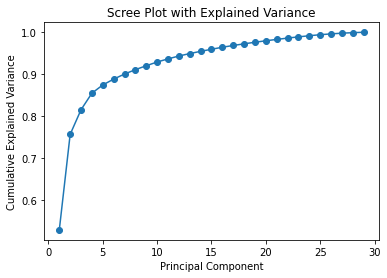


Jumlah komponen pada titik siku: 5


In [27]:
#Penentuan jumlah reduksi komponen pada kelompok pertama
pca_scree_plot(player_attributes[first_group])

Pada kelompok pertama, titik siku pada scree plot PCA adalah 5. Berdasarkan hal tersebut kelompok pertama akan direduksi menjadi 5 buah komponen utama

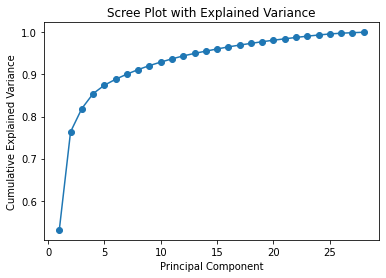


Jumlah komponen pada titik siku: 5


In [28]:
#Penentuan jumlah reduksi komponen pada kelompok kedua
pca_scree_plot(player_attributes[second_group])

Sama dengan kelompok pertama, kelompok kedua juga akan direduksi menjadi 5 komponen utama

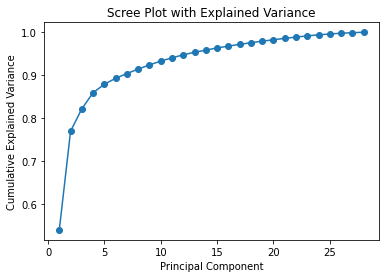


Jumlah komponen pada titik siku: 5


In [29]:
#Penentuan jumlah reduksi komponen pada kelompok ketiga
pca_scree_plot(player_attributes[third_group])

Sama dengan kelompok pertama dan kedua, kelompok ketiga akan direduksi menjadi 5 komponen utama

In [67]:
#Mereduksi masing-masing kelompok menjadi 5 komponen utama
pca = PCA(n_components=5)
first_group_attributes = pd.DataFrame(pca.fit_transform(player_attributes[first_group]))
second_group_attributes = pd.DataFrame(pca.fit_transform(player_attributes[second_group]))
third_group_attributes = pd.DataFrame(pca.fit_transform(player_attributes[third_group]))

# Modelling

Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan. Dalam kasus ini, digunakan machine learning dengan tipe regresi.

Machine learning regresi yang digunakan adalah model Xtreme Gradient Boosting atau XGB. Pemilihan model XGB sendiri didasari dari model tersebut yang mendukung lebih dari satu output mengingat terdapat 12 variabel independen yang berbeda. Di lain sisi, XGB merupakan model non-parametrik dimana model tersebut lebih resisten terhadap ketidakaturan atau noise pada data

Pembagian data latih dan uji umumnya dengan ratio 70-80% untuk data latih dan 20-30% untuk data uji menurut [sumber](https://drive.google.com/file/d/1NpAvCvRZD6QMg4DDliFFE68CVSB3addY/view). Pada kasus ini digunakan 70% untuk data latih dengan pertimbangan overfitting

### Pembagian Data Latih dan Uji pada Kelompok Pertama

In [30]:
from sklearn.model_selection import train_test_split
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(player_attributes[first_group], 
                                                                            player_position_transformed[
                                                                                ['rwb', 'lwb', 'rb', 'lb', 
                                                                                'cdm', 'lw', 'rw', 'st']
                                                                            ], 
                                                                            test_size=0.3, random_state=42)

### Pembagian Data Latih dan Uji pada Kelompok Kedua

In [31]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(player_attributes[second_group], 
                                                                            player_position_transformed['cb'], 
                                                                            test_size=0.3, random_state=42)

### Pembagian Data Latih dan Uji pada Kelompok Ketiga

In [32]:
X_train_third, X_test_third, y_train_third, y_test_third = train_test_split(player_attributes[third_group], 
                                                                            player_position_transformed[['lm', 'rm', 'cf']], 
                                                                            test_size=0.3, random_state=42)

### Pemodelan dengan XGBRegressor

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [34]:
cv_regressor = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scoring_regression = make_scorer(mean_absolute_error, greater_is_better=False)

In [35]:
pca = PCA(n_components=5)

xgb = XGBRegressor()

pipeline = Pipeline([
    ('pca', pca),
    ('xgb', xgb)
])

param_grid = {
    'xgb__max_depth': [4, 5, 6],
    'xgb__eta': [0.01, 0.1, 0.2]
}

**Pemodelan pada Kelompok Pertama**

In [36]:
grid_search_1 = GridSearchCV(pipeline, param_grid, cv=cv_regressor, scoring=scoring_regression)
grid_search_1.fit(X_train_first, y_train_first)

best_params_1 = grid_search_1.best_params_
best_model_1 = grid_search_1.best_estimator_

**Pemodelan pada Kelompok Kedua**

In [37]:
grid_search_2 = GridSearchCV(pipeline, param_grid, cv=cv_regressor, scoring=scoring_regression)
grid_search_2.fit(X_train_second, y_train_second)

best_params_2 = grid_search_2.best_params_
best_model_2 = grid_search_2.best_estimator_

**Pemodelan pada Kelompok Ketiga**

In [38]:
grid_search_3 = GridSearchCV(pipeline, param_grid, cv=cv_regressor, scoring=scoring_regression)
grid_search_3.fit(X_train_third, y_train_third)

best_params_3 = grid_search_3.best_params_
best_model_3 = grid_search_3.best_estimator_

# Evaluation

Melakukan interpretasi terhadap hasil dari data mining yang dihasilkan dalam proses pemodelan pada tahap sebelumnya. Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya dengan tujuan agar model yang ditentukan dapat sesuai dengan tujuan yang ingin dicapai dalam tahap pertama.

Metrik evaluasi yang digunakan adalah metrik utama yang ada dalam [paper](https://arxiv.org/ftp/arxiv/papers/1809/1809.03006.pdf) dan evaluasi menggunakan analisis residual. Analisis residual digunakan untuk menguji validitas model yang sudah dilatih, apabila residual terjadi secara acak maka model valid, jika tidak atau berpola maka model kurang dapat diandalkan

### Evaluasi Model Kelompok Pertama

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
predict_1 = best_model_1.predict(X_test_first)

In [47]:
#MAE dari model kelompok pertama
mae_1 = mean_absolute_error(y_test_first, np.round(predict_1))
print(f"Mean Absolute Error Kelompok Pertama: {mae_1}")

Mean Absolute Error Kelompok Pertama: 1.0159618573797677


In [48]:
#MSE dari model kelompok pertama
mse_1 = mean_squared_error(y_test_first, np.round(predict_1))
print(f"Mean Squared Error Kelompok Pertama: {mse_1}")

Mean Squared Error Kelompok Pertama: 1.8954993550764696


In [60]:
#MSE dari model kelompok pertama
rmse_1 = mean_squared_error(y_test_first, np.round(predict_1), squared=False)
print(f"Root Mean Squared Error Kelompok Pertama: {rmse_1}")

Root Mean Squared Error Kelompok Pertama: 1.3609587854404037


In [49]:
#R2 (R-squared) dari model kelompok pertama
r2_1 = r2_score(y_test_first, np.round(predict_1))
print(f"r2 Kelompok Pertama: {r2_1}")

r2 Kelompok Pertama: 0.9895161472158611


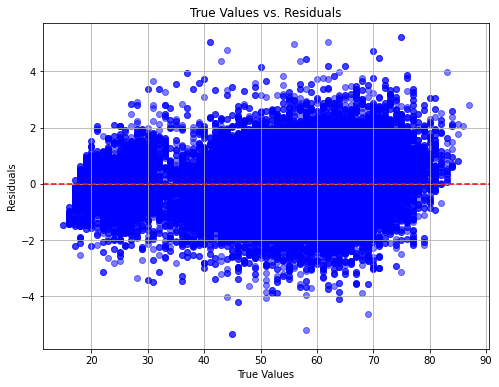

In [43]:
#Analisis residual model kelompok pertama
residuals = y_test_first.values - predict_1
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_first.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Hasil dari model kelompok pertama menunjukkan hasil yang cukup memuaskan. MAE dari model kelompok pertama hanya pada sekitar ~1, hal tersebut berarti kesalahan model hanya 0.01 atau 1% dari range data secara rata-rata. Analisis residu dari model kelompok pertama juga menunjukkan hasil yang baik, dimana residu berbentuk simetris terhadap garis nilai aslinya. Residu yang berbentuk simetris berarti model dapat diandalkan dan hasilnya dapat dipercaya

### Evaluasi Model Kelompok Kedua

In [45]:
predict_2 = best_model_2.predict(X_test_second)

In [50]:
#MAE dari model kelompok kedua
mae_2 = mean_absolute_error(y_test_second, np.round(predict_2))
print(f"Mean Absolute Error Kelompok Kedua: {mae_2}")

Mean Absolute Error Kelompok Kedua: 0.6441864750322461


In [52]:
#MSE dari model kelompok kedua 
mse_2 = mean_squared_error(y_test_second, np.round(predict_2))
print(f"Mean Squared Error Kelompok Kedua: {mse_2}")

Mean Squared Error Kelompok Kedua: 0.8855721393034826


In [61]:
#RMSE dari model kelompok kedua 
rmse_2 = mean_squared_error(y_test_second, np.round(predict_2), squared=False)
print(f"Root Mean Squared Error Kelompok Kedua: {rmse_2}")

Root Mean Squared Error Kelompok Kedua: 0.9410484255889717


In [53]:
#R2 (R-squared) dari model kelompok kedua
r2_2 = r2_score(y_test_second, np.round(predict_2))
print(f"r2 Kelompok Kedua: {r2_2}")

r2 Kelompok Kedua: 0.9957606738867911


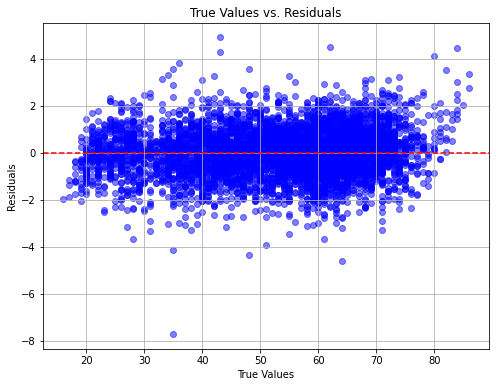

In [57]:
#Analisis residual model kelompok kedua
residuals = y_test_second.values - predict_2
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_second.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Hasil dari model kelompok kedua menunjukkan hasil yang sangat memuaskan. MAE dari model kelompok kedua kurang dari 1, hal tersebut berarti kesalahan model kurang dari 1% terhadap range nilai data. Analisis residu dari model kelompok keuda juga menunjukkan hasil yang cukup baik, residu berbentuk simetris terhadap garis nilai asli, walaupun terdapat 1 titik outlier. Titik outlier tersebut dapat diabaikan karena tidak berjumlah banyak, sehingga model tetap dapat diandalkan dan dipercaya hasilnya

### Evaluasi Model Kelompok Ketiga

In [62]:
predict_3 = best_model_3.predict(X_test_third)

In [63]:
#MAE dari model kelompok ketiga
mae_3 = mean_absolute_error(y_test_third, np.round(predict_3))
print(f"Mean Absolute Error Kelompok Ketiga: {mae_3}")

Mean Absolute Error Kelompok Ketiga: 1.3390455131748666


In [65]:
#MSE dari model kelompok ketiga 
mse_3 = mean_squared_error(y_test_third, np.round(predict_3))
print(f"Mean Squared Error Kelompok Ketiga: {mse_3}")

Mean Squared Error Kelompok Ketiga: 3.0576131687242802


In [66]:
#RMSE dari model kelompok ketiga 
rmse_3 = mean_squared_error(y_test_third, np.round(predict_3), squared=False)
print(f"Root Mean Squared Error Kelompok Ketiga: {rmse_3}")

Root Mean Squared Error Kelompok Ketiga: 1.7482932885001568


In [67]:
#R2 (R-squared) dari model kelompok kedua
r2_3 = r2_score(y_test_third, np.round(predict_3))
print(f"r2 Kelompok Ketiga: {r2_3}")

r2 Kelompok Ketiga: 0.9828352796542181


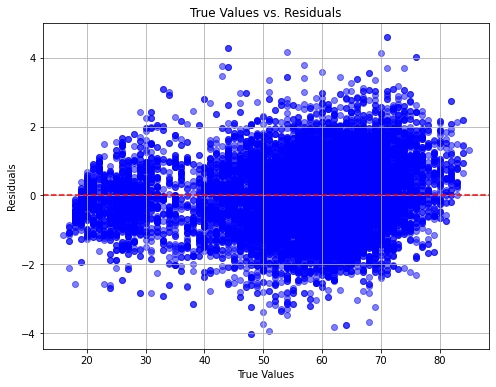

In [68]:
#Analisis residual model kelompok ketiga
residuals = y_test_third.values - predict_3
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_third.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Hasil dari model kelompok ketiga  menunjukkan hasil yang baik. MAE dari model kelompok ketiga hanya pada sekitar ~1, hal tersebut berarti kesalahan model masih berada di sekitar 1% dari range data. Analisis residu dari model kelompok ketiga juga menunjukkan hasil yang cukup baik, residu berbentuk cukup simetris, walaupun dengan catatan residu bagian atas terlihat sedikit lebih menyebar daripada bagian bawah. Model tetap dapat diandalkan dan dipercaya karena tingkat asimetris yang tidak parah

# Deployment

Deployment adalah saat dimana hasil proses analisis data disampaikan dan digunakan. Model yang sudah dibentuk kemudian di-packing untuk digunakan sebagai prediktor input.

In [70]:
#Mempacking Model yang Sudah Dilatih dan Dievaluasi dalam Format Pickle
import pickle
import os

save_directory = '../Model/'

os.makedirs(save_directory, exist_ok=True)

model_file_pertama = os.path.join(save_directory, 'model_pertama.pkl')
model_file_kedua = os.path.join(save_directory, 'model_kedua.pkl')
model_file_ketiga = os.path.join(save_directory, 'model_ketiga.pkl')


with open(model_file_pertama, 'wb') as file:
    pickle.dump(best_model_1, file)
    
with open(model_file_kedua, 'wb') as file:
    pickle.dump(best_model_2, file)
    
with open(model_file_ketiga, 'wb') as file:
    pickle.dump(best_model_3, file)